In [0]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

ImageDataGenerator =  tf.keras.preprocessing.image.ImageDataGenerator
models = tf.keras.models
layers = tf.keras.layers
optimizers = tf.keras.optimizers

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
%cd '/content/gdrive/My Drive/Colab Notebooks/tomato/tomato_dataset'
!ls

/content/gdrive/My Drive/Colab Notebooks/tomato/tomato_dataset


In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    batch_size=25)
validation_generator = validation_datagen.flow_from_directory(
    'validation',
    batch_size=25)

Found 7000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
callbacks_list = [
  tf.keras.callbacks.ModelCheckpoint(
    filepath='tomato.h5',
    monitor='val_loss',
    save_best_only=True,
  ),
  tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
  )
]

In [30]:
history = model.fit(
        train_generator,
        steps_per_epoch=28,
        epochs=100,
        callbacks=callbacks_list,
        validation_data=validation_generator,
        validation_steps=6)

Epoch 1/100
28/28 [==============================] - 341s 12s/step - loss: 4.7046 - accuracy: 0.1514 - val_loss: 2.3123 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - 316s 11s/step - loss: 2.3970 - accuracy: 0.2043 - val_loss: 2.2955 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - 326s 12s/step - loss: 2.3648 - accuracy: 0.1814 - val_loss: 2.1223 - val_accuracy: 0.3400 - lr: 0.0010
Epoch 4/100
28/28 [==============================] - 336s 12s/step - loss: 2.2398 - accuracy: 0.2257 - val_loss: 1.9520 - val_accuracy: 0.2400 - lr: 0.0010
Epoch 5/100
28/28 [==============================] - 324s 12s/step - loss: 1.9600 - accuracy: 0.3371 - val_loss: 1.8175 - val_accuracy: 0.4133 - lr: 0.0010
Epoch 6/100
28/28 [==============================] - 325s 12s/step - loss: 1.8237 - accuracy: 0.3586 - val_loss: 1.7584 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/100
28/28 [==============================] - 297s 11s/st

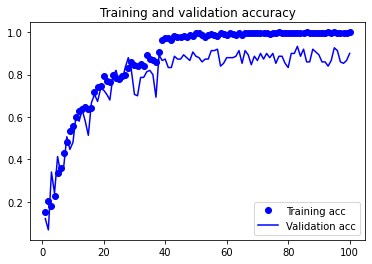

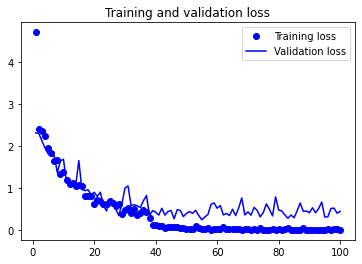

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()